In [ ]:
# Gradient Boosting Regressor Class

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.inspection import permutation_importance
import pydot
from IPython.display import Image, display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Definition of Random Forest Regression Class with functions

class gradientboostingreg:
    
    # Dunder method init
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
    
    # Dunder method del
    def __del__(self):
        print("The Scikit Learn Gradient Boosting Regressor has been deleted")
        
    # Initialize and Train Regression Model
    def buildregmodel(self,x_train, y_train, loss, learning_rate, subsample, no_of_estimators, measurement_criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf):
        self.x_train = x_train
        self.y_train = y_train
        self.no_of_estimators = no_of_estimators
        self.measurement_criterion = measurement_criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.min_weight_fraction_leaf = min_weight_fraction_leaf
        self.loss = loss
        self.learning_rate = learning_rate
        self.subsample = subsample
        
        boostregmodel = GradientBoostingRegressor(n_estimators=no_of_estimators, criterion = measurement_criterion, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, min_weight_fraction_leaf = min_weight_fraction_leaf)      
        boostregmodel.fit(x_train,y_train)
        self.boostregmodel = boostregmodel
        
        return boostregmodel
    
    # Evaluate and test the model of the Scikit Learn Random Forest Regressor
    def testregmodel(self):
        score=self.boostregmodel.score(x_test,y_test)
        return score
    
    # Build 3 graphs that represent the gradient boosting regression results
    def get_gradient_boosting_graphs(self):
        feature_list = list(self.x_train.columns)
        fig = plt.figure(figsize=(18, 6))
        
        # 1st graph:
        test_score = np.zeros((self.no_of_estimators), dtype=np.float64)
        for i, y_pred in enumerate(self.boostregmodel.staged_predict(x_test)):
            test_score[i] = self.boostregmodel.loss_(self.y_test, y_pred)
        
        plt.subplot(1, 3, 1)
        plt.title('Deviance', loc='center')
        plt.plot(np.arange(self.no_of_estimators) + 1, self.boostregmodel.train_score_, 'b-', label='Training Set Deviance')
        plt.plot(np.arange(self.no_of_estimators) + 1, test_score, 'r-', label='Test Set Deviance')
        plt.legend(loc='upper right')
        plt.xlabel('Boosting Iterations')
        plt.ylabel('Deviance')
        
        # 2nd graph: Feature Importance (MDI)
        feature_importance = self.boostregmodel.feature_importances_
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        plt.subplot(1, 3, 2)
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(feature_list)[sorted_idx])
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance (MDI)' , loc='center')
        
        # 3rd graph: Permutation Importance (test set)
        result = permutation_importance(self.boostregmodel, self.x_test, self.y_test, n_repeats=10, random_state=42, n_jobs=2)
        sorted_idx2 = result.importances_mean.argsort()
        plt.subplot(1, 3, 3)
        plt.boxplot(result.importances[sorted_idx2].T, vert=False, labels=np.array(feature_list)[sorted_idx2])
        plt.title("Permutation Importance (test set)", loc='center')
        plt.xlabel('Permutation Importance')
        
        # Show and save figure
        fig.tight_layout()
        plt.show()
        fig.savefig("Gradient_Boosting_Regressor_Graphs.png")    
   
    # Predict new results
    def predictregmodel(self, x_predict):
        self.x_predict = x_predict
        
        y_predict=self.boostregmodel.predict(x_predict)
        return y_predict
    


In [3]:
# Read Data Set and Split into X_Train, Y_Train, X_Test and Y_Test

# Read Data Set
df=pd.read_excel('Real estate valuation data set.xlsx')

# Define X and Y Data
x=df.drop(columns=['Y house price of unit area', 'No']) # inputs
y=df['Y house price of unit area']                # outputs

# Splitting the data (20% recommended)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [4]:
# Define Settings for Regressor

#Criteria for the Gradient Boosting Regressor Model:
loss = 'ls' # loss{‘ls’, ‘lad’, ‘huber’, ‘quantile’}
learning_rate = 0.1 # Float Value 
subsample = 1.0 # Float Value
no_of_estimators = 10 # integer value: number of trees in the forest
measurement_criterion = 'mae' #also possible: mse, mae
max_depth = 10 # integer value: maximum depth of the tree
min_samples_split = 2 # integer value: the min number of samples required to split an internal node
min_samples_leaf = 2 # integer value: The minimum number of samples required to be at a leaf node
min_weight_fraction_leaf = 0.007 # float value between 0 and 0.5 The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

In [5]:
# Initialize the Regression Model

regressionmodel = gradientboostingreg(x_train, x_test, y_train, y_test) # creation of the object
boostregmodel = regressionmodel.buildregmodel(x_train, y_train, loss, learning_rate, subsample, no_of_estimators, measurement_criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf) # creation of the model

In [6]:
# Get Model Quality Information

quality = regressionmodel.testregmodel() # measure of the quality 
print(measurement_criterion + "=" + str(quality))

mae=0.7175861431015206


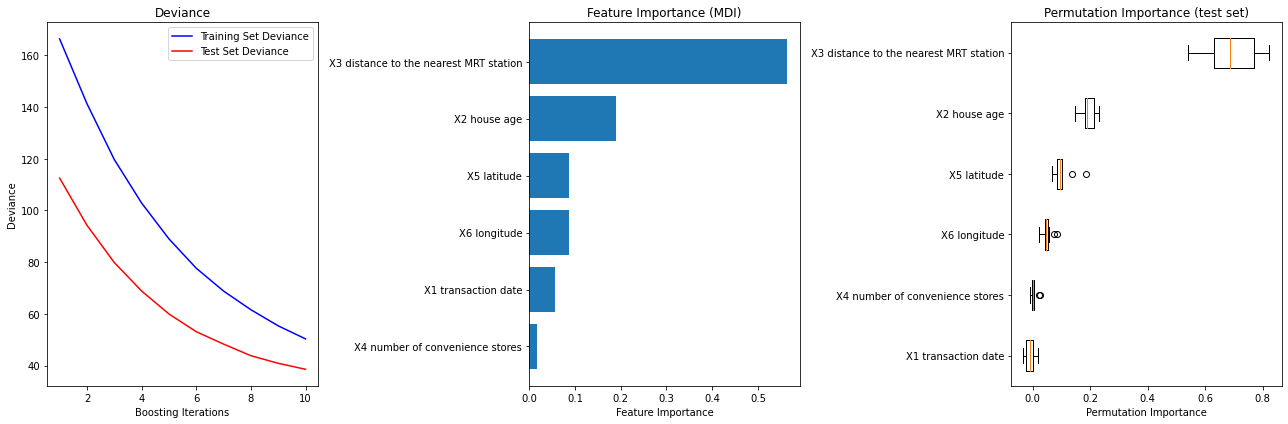

In [7]:
# Plotting Variable Importances

regressionmodel.get_gradient_boosting_graphs()



In [8]:
# Predict Values
x_predict = [[2017, 25, 60, 20, 20, 100]]
predicted_Y = regressionmodel.predictregmodel(x_predict)
print(predicted_Y)

[40.08824719]


In [9]:
# Get Forest Parameters
parameters = boostregmodel.get_params()
print(parameters)

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'mae', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.007, 'n_estimators': 10, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
